# Bank Marketing

## Members: Fangyi Wang and  Dren Krasniqi 

### The question we want to solve is, based on some information about the customer, can we predict whether the customer has subscribed a term deposit?

## Data set URL: 
https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Data Set information 

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Attribute Information:

# Bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education    (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')    
# Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
# Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  


In [12]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [13]:
import pandas as pd
df = pd.read_csv('Bank Dataset.csv', sep=';', header=0)
df = df.rename(columns={'age;': 'age'})
print(df)


      age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

        contact month day_of_week  ... 

In [14]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [15]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [17]:
#We will check the categoriacal variables what they are for Job, Age, Merital and Education

df["job"].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [18]:
df["age"].unique()

array([30, 39, 25, 38, 47, 32, 41, 31, 35, 36, 29, 27, 44, 46, 45, 50, 55,
       40, 28, 34, 33, 51, 48, 20, 76, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70])

In [19]:
df["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [20]:
df["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

## EDA 

### Categorical Variables

To begin, we conduct an exploratory analysis of the categorical variables to identify their categories and determine  if any of them have missing values. The bar graphs below were generated using the seaborn package.

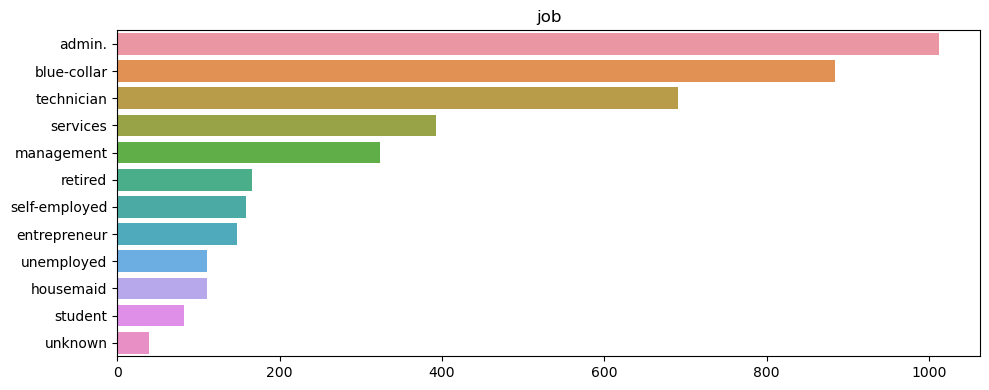

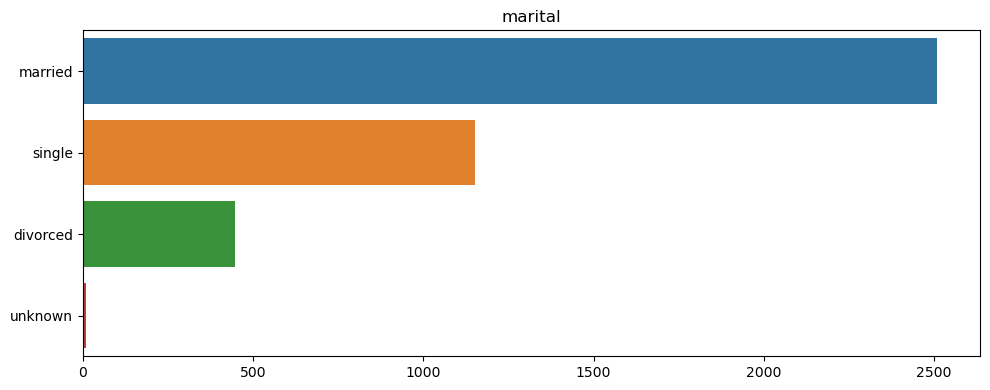

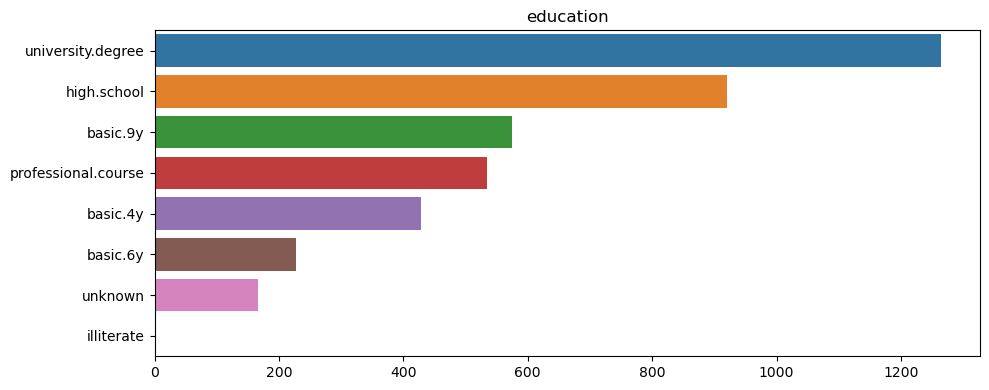

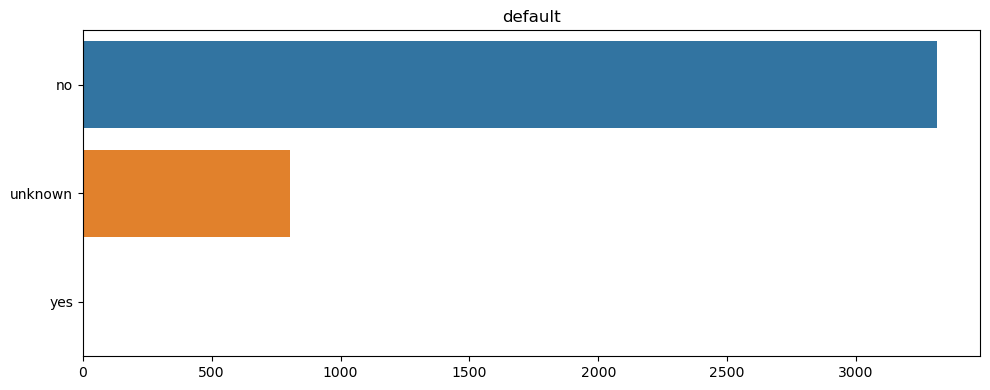

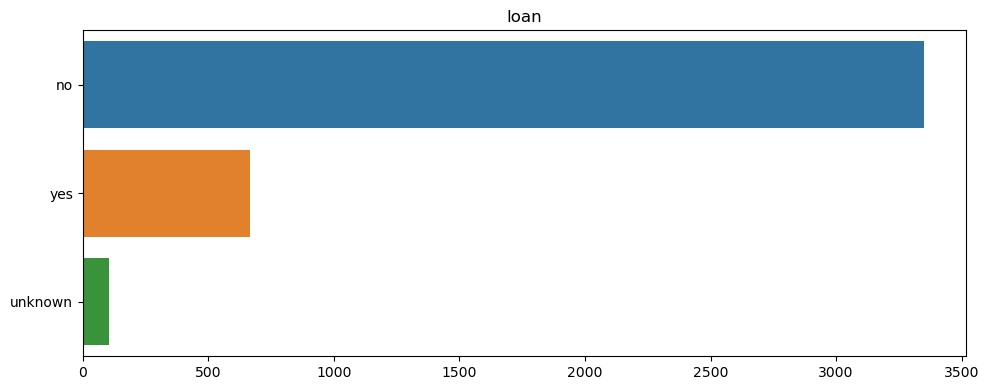

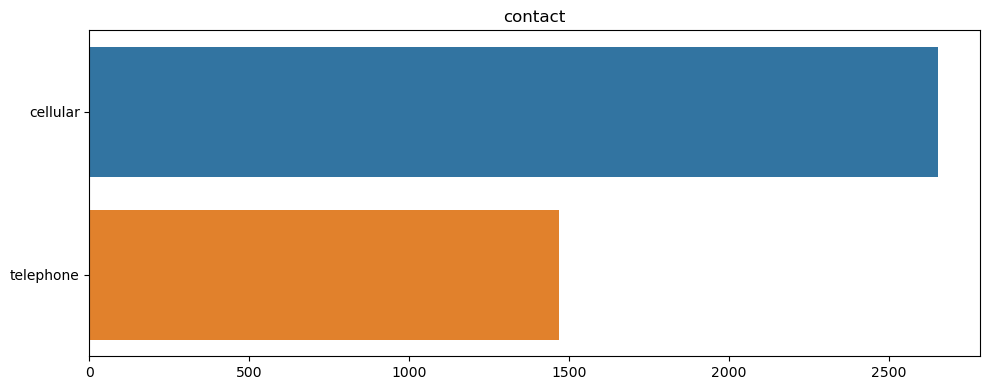

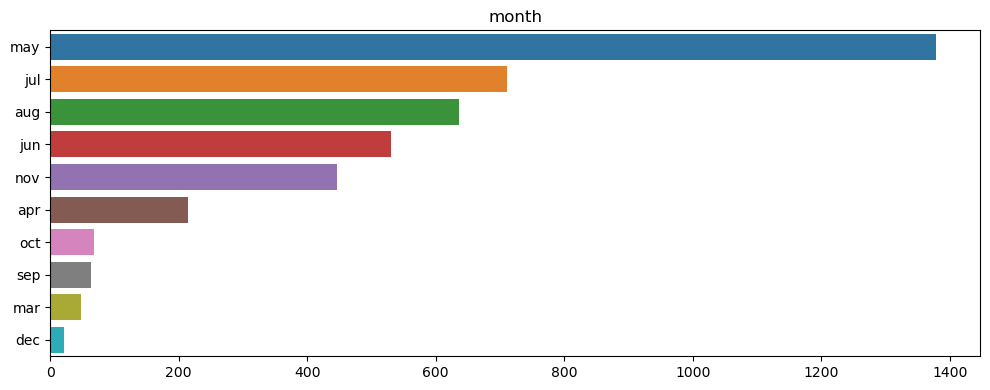

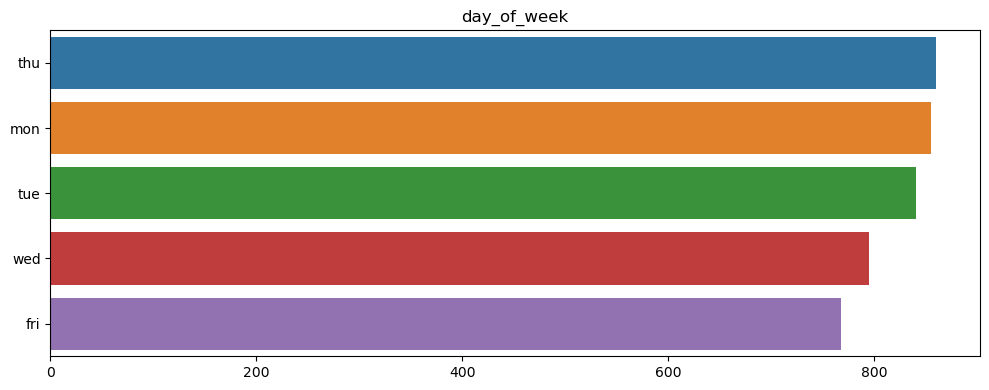

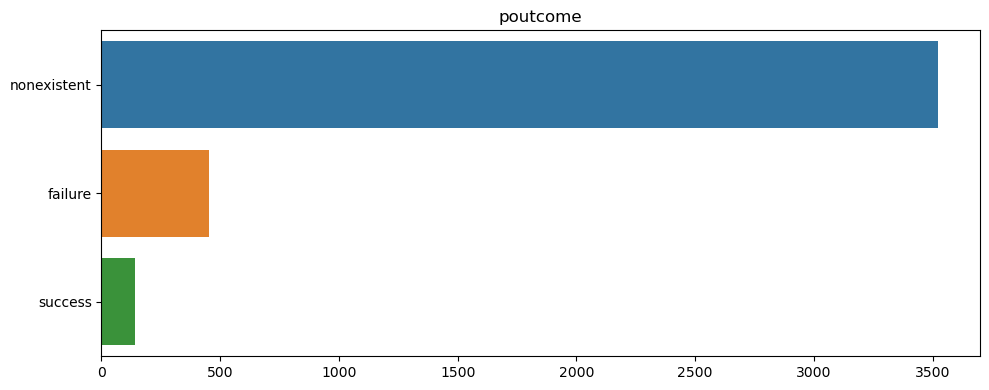

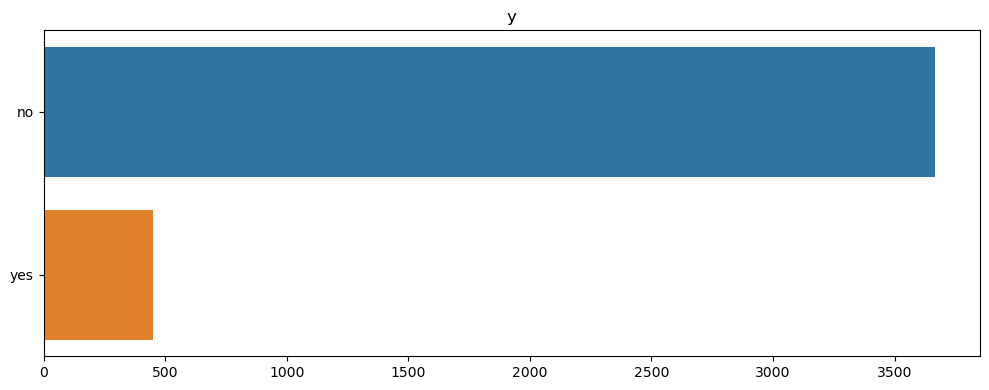

In [21]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

#### Observation from the above data: 

 1. Regarding Job, the bank appears to be targeting high salaried individuals as there are more job types such 
   as Admin, Technician, and blue-collar.  
 2. With Marital status, there seems to be more married people.  
 3. The Education category shows that more people have a university degree, which is expected for high salaried individuals.The count of illiterate individuals is very low.  
 4. For the default category, most people have no credit default, which indicates that they can be approached.  
 5. Regarding housing, individuals who have not taken any housing loans should be given more importance.  
 6. For the loan category, individuals who have not taken any personal loans should be given more importance.  
 7. Based on the month column, May appears to be a busy season in Portugal.  
 8. The Day_of_week column suggests that every day is busy except weekends.  
 9. The p_outcome column shows that the success rate of the previous marketing campaign was small.

## Target Variable correlation per category

We normalized the distribution of each class per feature and plotted the difference between the frequencies of positive and negative outcomes. A positive value indicates that this category is more favorable towards clients who will subscribe, while a negative value suggests that the category is more favorable towards clients who will not buy the product

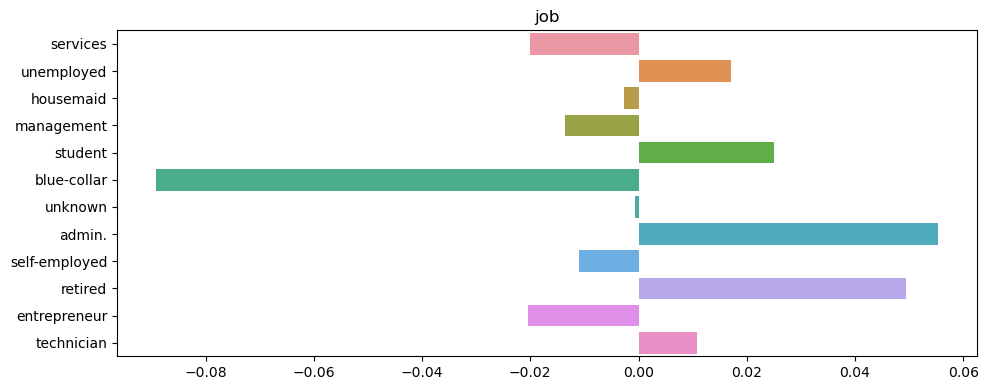

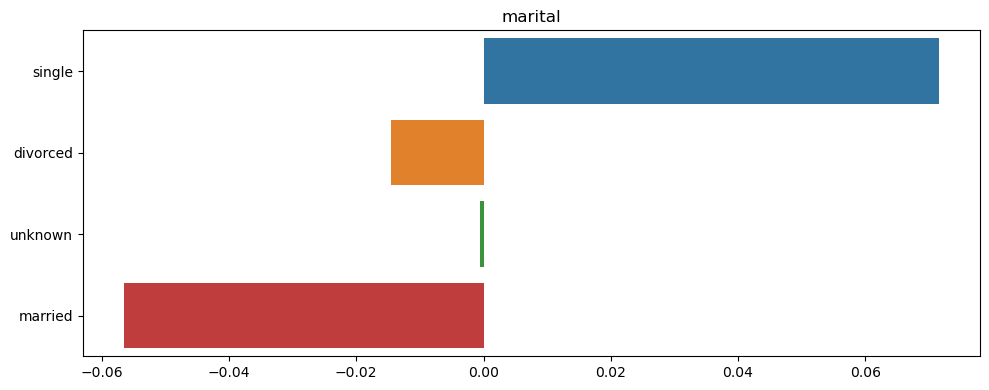

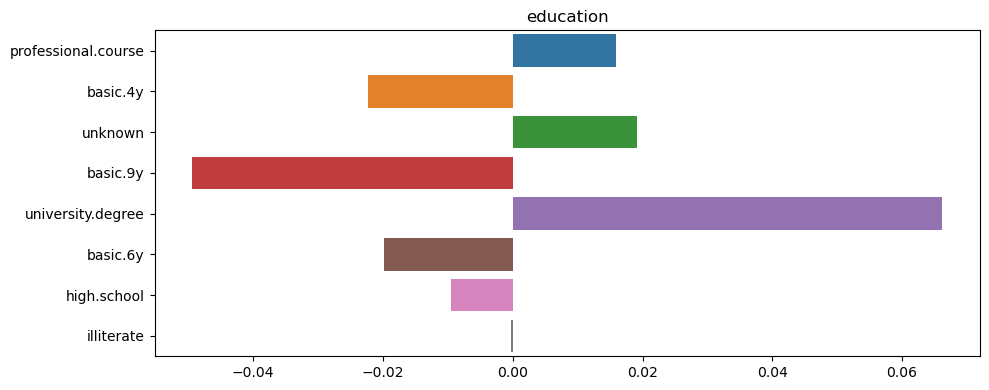

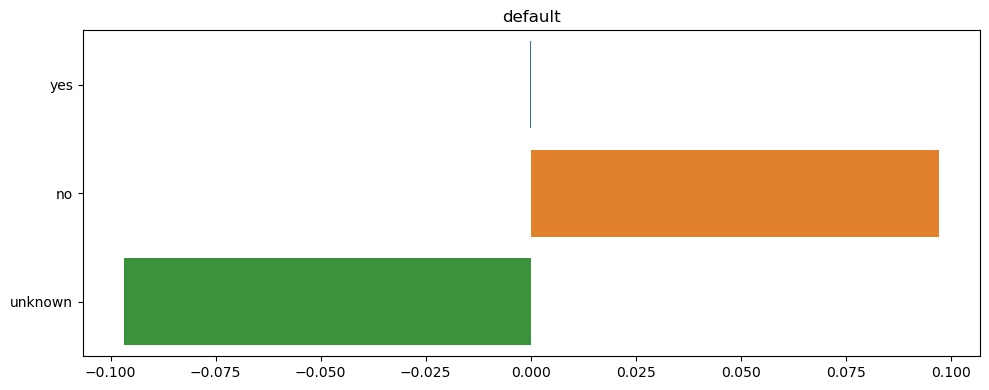

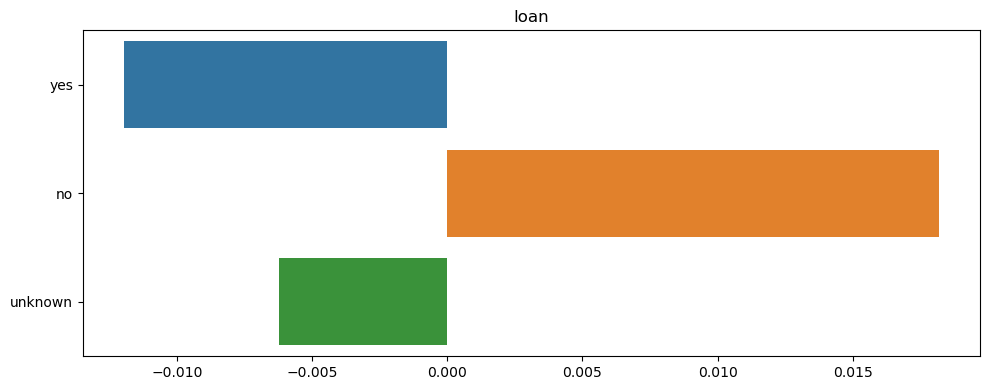

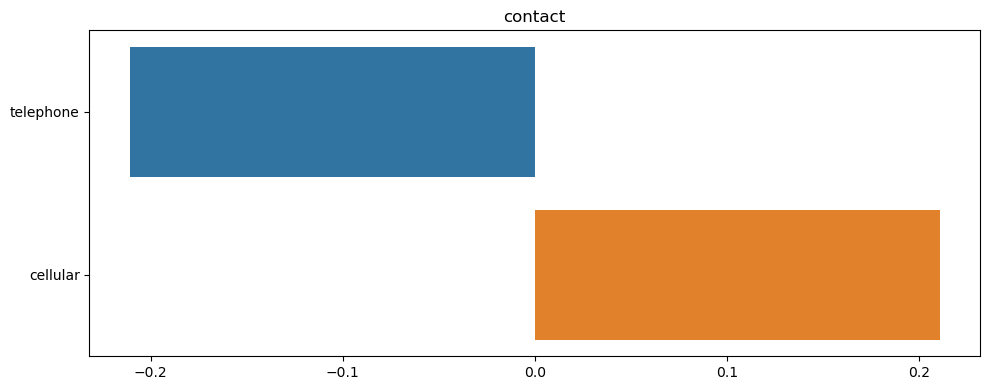

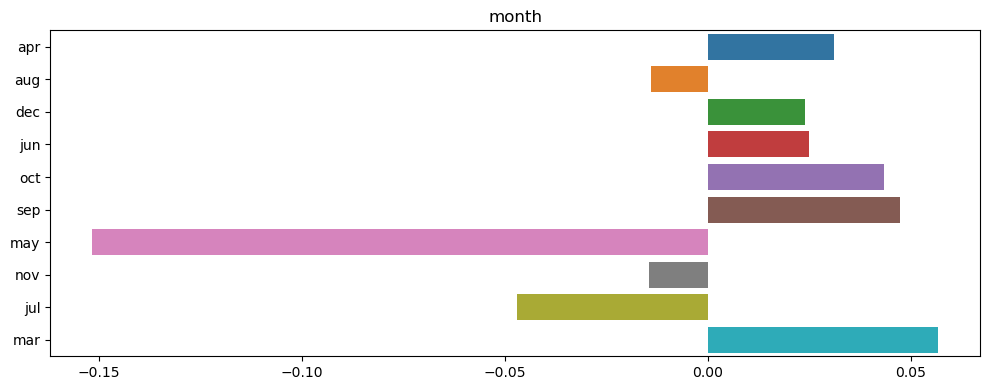

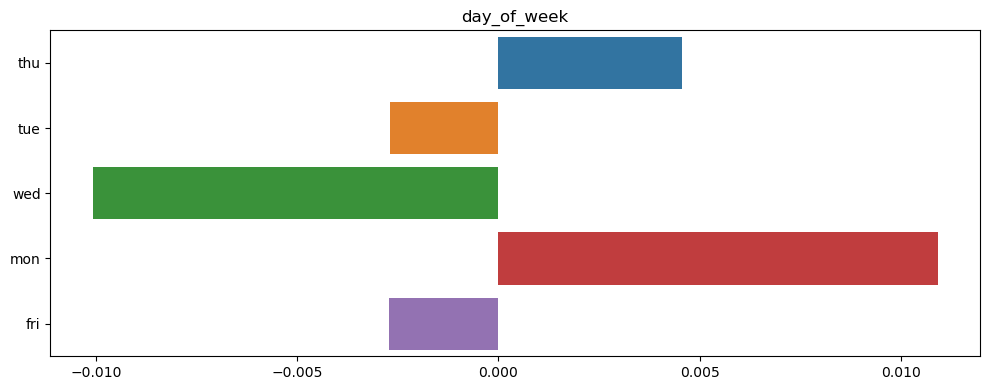

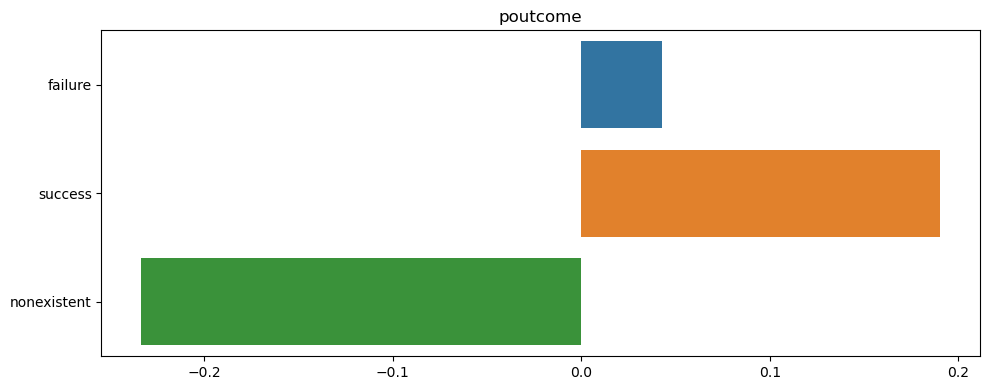

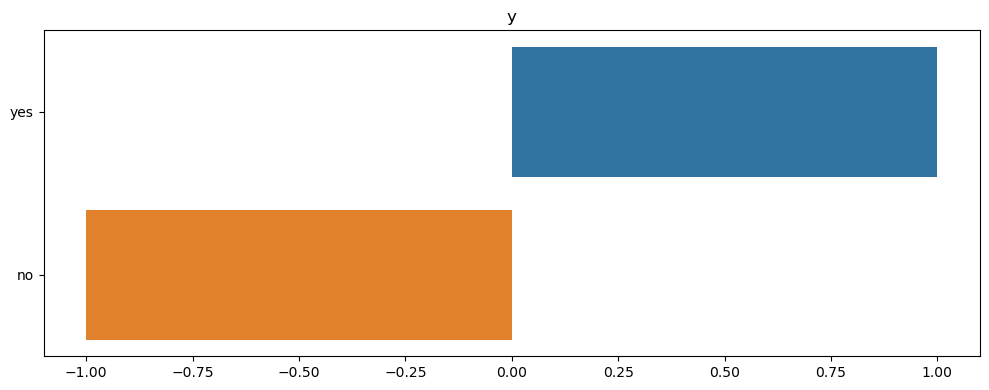

In [22]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

#### Observations:
The dataset contains numerous variables with unknown values, and there are several ways to handle this missing data.
One approach is to discard the row, but this results in a reduction of the dataset and can compromise the accuracy 
of our prediction model.

Alternatively, we can employ imputation techniques to infer the value of the unknown variable from other independent
variables. While this method does not guarantee that all missing values will be addressed, it can provide reasonable
estimates for the majority of them, which can still be useful in the prediction.

The variables with missing values include 'education', 'job', 'housing', 'loan', 'default', and 'marital', 
with 'education', 'job', 'housing', and 'loan' being the most significant. The number of unknowns for 'marital' 
is minimal, and the unknowns for the 'default' variable are recorded as unknown, as it is possible that customers 
may not want to disclose this information to banking representatives. Therefore, the unknown value in 'default' is 
considered a separate value.

To investigate whether there is a pattern in the missing values, we create new variables for the unknown values 
in 'education', 'job', 'housing', and 'loan'. This is done to determine whether the values are missing at random 
or if there is a pattern in the missing data that we will discover.


In [23]:
# Creating new variables (variable name + '_un') to capture the information if the missing values are at random or is there
# a pattern in the missing values.
significant_cat_variables = ['education','job','housing','loan']
for var in significant_cat_variables:
    #df[var + '_un'] = 0
    #df[var + '_un'][df[var]=='unknown'] = 1
    #FIXME one-line coding
    df[var + '_un'] = (df[var] == 'unknown').astype(int)

### Missing Values

To infer the missing values in the 'job' and 'education' variables, we utilize the cross-tabulation between the 
two variables. Our hypothesis is that a person's 'job' is influenced by their 'education', and we can infer the 
'job' based on their education. Since we are only filling in the missing values and are not particularly concerned
with causal inference, we can also use 'job' to predict 'education'.

In [24]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [25]:
cross_tab(df,'job','education')

,basic.9y,high.school,university.degree,professional.course,basic.6y,basic.4y,unknown,illiterate
job,,,,,,,,
admin.,44,311,567,38,20.0,8,24,0.0
blue-collar,324,89,6,49,152.0,222,42,0.0
entrepreneur,23,17,64,14,5.0,18,7,0.0
housemaid,5,11,22,8,9.0,52,3,0.0
management,20,41,220,7,8.0,13,15,0.0
retired,11,24,32,28,6.0,59,5,1.0
self-employed,28,15,87,12,2.0,11,4,0.0
services,56,254,18,25,12.0,16,12,0.0
student,5,35,12,8,0.0,2,20,0.0


In [26]:
df['job'][df['age']>60].value_counts()

retired          51
housemaid         9
unknown           4
blue-collar       3
management        3
technician        3
admin.            3
self-employed     2
unemployed        1
Name: job, dtype: int64

#### Input: 

**Inferring education from jobs:** Based on the cross-tabulation, it is apparent that individuals with management 
jobs usually possess a university degree. Therefore, in cases where 'job' is 'management' and 'education' is 
unknown, we can replace 'education' with 'university.degree'. Similarly, if 'job' is 'services', then 'education' 
can be inferred as 'high.school', and if 'job' is 'housemaid', then 'education' can be inferred as 'basic.4y'.

**Inferring jobs from education:** If 'education' is 'basic.4y', 'basic.6y', or 'basic.9y', then the corresponding 
'job' is typically 'blue-collar'. On the other hand, if 'education' is 'professional.course', then the 'job' is 
likely to be 'technician'.

**Inferring jobs from age:** It is observed that if 'age' is greater than 60, the individual's job is typically 
'retired', which is logical.

During the imputation of values for 'job' and 'education', we made sure that the correlations made sense in the
real world. If they did not seem plausible, we did not replace the missing values.

In [27]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [28]:
cross_tab(df,'job','education')

,basic.9y,high.school,university.degree,professional.course,basic.6y,basic.4y,unknown,illiterate
job,,,,,,,,
admin.,44.0,311,567,38.0,20.0,8.0,24.0,0.0
blue-collar,330.0,89,6,49.0,153.0,228.0,42.0,0.0
entrepreneur,23.0,17,64,14.0,5.0,18.0,7.0,0.0
housemaid,5.0,11,22,8.0,9.0,55.0,0.0,0.0
management,20.0,41,235,7.0,8.0,13.0,0.0,0.0
retired,11.0,24,32,28.0,6.0,61.0,7.0,1.0
self-employed,28.0,15,87,12.0,2.0,11.0,4.0,0.0
services,56.0,266,18,25.0,12.0,16.0,0.0,0.0
student,5.0,35,12,8.0,0.0,2.0,20.0,0.0


we are able to reduce the number of unknowns and enhance our data set.


In [29]:
jobhousing=cross_tab(df,'job','housing')
jobloan=cross_tab(df,'job','loan')

#### Input 

To impute the missing values for 'house' and 'loan', we employed cross-tabulation between 'house' and 'job', 
and between 'loan' and 'job'. Our hypothesis was that the proportion of housing loan status (Yes or No) should 
align with the distribution of each job category. Therefore, we utilized the known distribution of the housing 
loan for each job category to predict the housing loan for individuals with missing values, while maintaining 
the prior distribution of % House for each job category. Similarly, we used the same approach to fill in the 
missing values for the 'loan' variable.

In [30]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [31]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [32]:
df=fillhousing(df,jobhousing)

In [33]:
df=fillloan(df,jobloan)

### Numerical Variables: 

Lets look at the missing values for the numerical variables 

In [34]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Regarding missing values:** we were informed that '999' is used to encode NaNs in the data source (U.C. Irvine ML Repository). The table shows that 'pdays' has the majority of missing values.

**In terms of outliers:** they are identified as values exceeding 1.5 times the third quartile (Q3) value. Only 'age' and 'campaign' exhibit outliers, with max('age') and max('campaign') surpassing 1.5Q3('age') and 1.5Q3('campaign'), respectively.

However, these outliers have plausible values (max('age')=98 and max('campaign')=56). Therefore, it is unnecessary to eliminate them because prediction models should reflect real-world situations. This enhances the model's ability to generalize and cope with real-world conditions. As a result, we keep the outliers.

### Missing Values in Numerical Data 

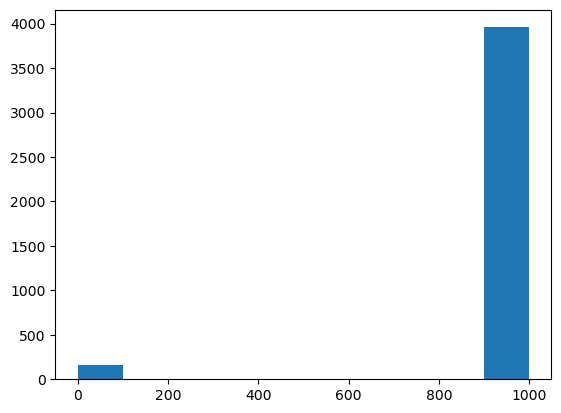

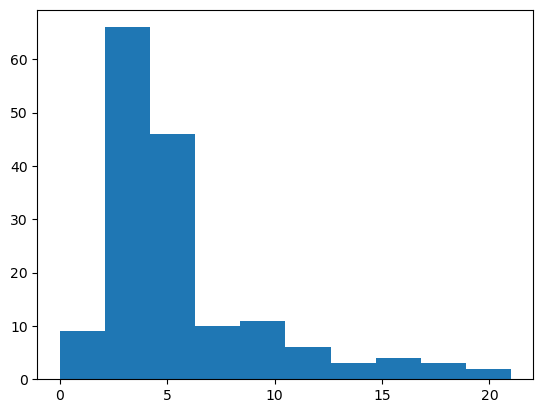

In [35]:
def drawhist(df,feature):
    plt.hist(df[feature])
    
drawhist(df,'pdays')
plt.show()

plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [36]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000486
1,0.000000,0.000000,0.000728
2,0.000000,0.000000,0.000971
3,0.000486,0.000000,0.012139
4,0.000000,0.000000,0.003399
5,0.000000,0.000000,0.000971
6,0.000728,0.000000,0.009468
7,0.000243,0.000000,0.002185
9,0.000486,0.000000,0.000243


**Observation:** The table above illustrates that a considerable portion of the 'pdays' values are absent. Most of these absent values correspond to 'non-existent' 'poutcome'. This implies that the majority of the 'pdays' values are missing due to the customer never being contacted before. To address this variable, we substituted the numerical variable 'pdays' with categorical variables containing the following categories: p_days_missing, pdays_less_5, pdays_bet_5_15, and pdays_greater_15.

In [37]:
#Add new categorical variables to our dataframe.
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df_dropped_pdays = df.drop('pdays', axis=1);

Dummy variables needs to be created for those vaiables since we have many categorical values

Drop one of the dummy variables as for categories we only need -1 dummy variables.

In [38]:
df_with_dummies=pd.get_dummies(df_dropped_pdays)

In [39]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [40]:
features_dropped = ['default_no','housing_no','loan_no','y_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown', 'pdays_less_5']
df_clean = dropfeature(df_with_dummies, features_dropped)

In [41]:
df_clean.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_un,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,30,487,2,0,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,1,0,0,0,0,0,1,0,0
1,39,346,4,0,1.1,93.994,-36.4,4.855,5191.0,0,...,0,1,0,0,0,0,0,1,0,0
2,25,227,1,0,1.4,94.465,-41.8,4.962,5228.1,0,...,0,0,0,0,0,1,0,1,0,0
3,38,17,3,0,1.4,94.465,-41.8,4.959,5228.1,0,...,0,1,0,0,0,0,0,1,0,0
4,47,58,1,0,-0.1,93.200,-42.0,4.191,5195.8,0,...,0,0,1,0,0,0,0,1,0,0


### Feature Scaling

**Feature Scaling**：Different metrics exist for our data and to optimize model performance, we choose to perform feature scaling.

In [53]:
print(df_clean.columns)

Index(['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'education_un', 'job_un', 'housing_un', 'loan_un', 'pdays_missing',
       'pdays_greater_15', 'pdays_bet_5_15', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mo

In [58]:
non_binary_columns = [col for col in df_clean.columns if not set(df_clean[col].unique()).issubset({0, 1})]
scaler = MinMaxScaler()
df_clean[non_binary_columns] = scaler.fit_transform(df_clean[non_binary_columns])


In [59]:
df_clean.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,education_un,job_un,housing_un,loan_un,pdays_missing,pdays_greater_15,pdays_bet_5_15,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_unknown,default_yes,housing_yes,loan_yes,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,0.171429,0.133681,0.029412,0.0,0.333333,0.269680,0.192469,0.153741,0.512287,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.300000,0.094977,0.088235,0.0,0.937500,0.698753,0.602510,0.956916,0.859735,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,0.100000,0.062311,0.000000,0.0,1.000000,0.882307,0.376569,0.981179,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
3,0.285714,0.004666,0.058824,0.0,1.000000,0.882307,0.376569,0.980499,1.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.414286,0.015921,0.000000,0.0,0.687500,0.389322,0.368201,0.806349,0.877883,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


### PCA

Since our data has too many features, we need to reduce the dimensionality of the data first, and then perform feature selection

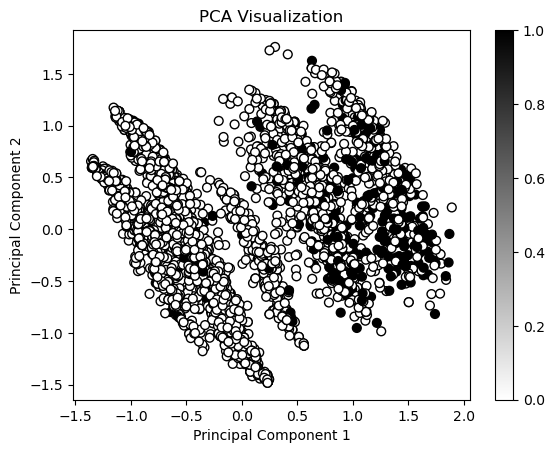

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

X = df_clean.drop('y_yes', axis=1) 
y = df_clean['y_yes']  

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='binary', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar()
plt.show()

Black is more clustered on the left and white is more clustered on the right. This means that the PCA effect is okay

### Feature Selection

We select the top 10 best features by Chi-Squared statistics

We first selected the first 15 best features and then 10 more best features, and finally we found that selecting the 10 best features gave the best results

In [108]:
k = 10
selector = SelectKBest(chi2, k=k)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]

X_selected = selector.transform(X)
df_selected = pd.DataFrame(X_selected, columns=selected_features)

### SVM

In [109]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.3, random_state=42)

svm = SVC()

#Hyperparameter adjustment

param_grid = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf'],
    'gamma': np.logspace(-3, 3, 7)
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_svm = SVC(**best_params)
best_svm.fit(X_train, y_train)

Best parameters: {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=100.0, gamma=0.1)

In [110]:
# Predict
y_pred = best_svm.predict(X_test)

# Evaluation of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Check if this model is over-fitted
train_score = best_svm.score(X_train, y_train)
test_score = best_svm.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1105
           1       0.65      0.34      0.45       131

    accuracy                           0.91      1236
   macro avg       0.79      0.66      0.70      1236
weighted avg       0.90      0.91      0.90      1236

Accuracy Score:
0.9110032362459547
Train score: 0.920568851890392
Test score: 0.9110032362459547


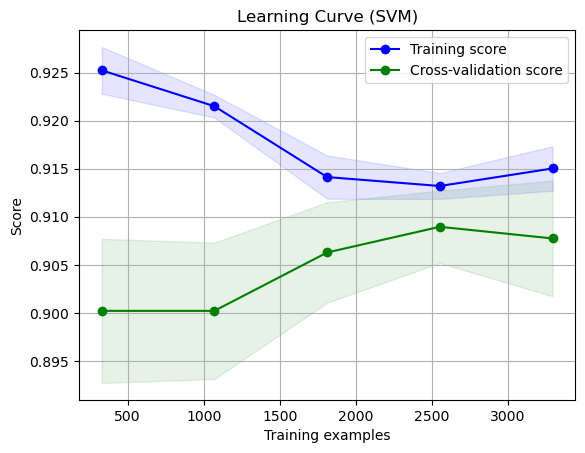

In [83]:
#Learning Curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="green")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(best_svm, df_selected, y, title="Learning Curve (SVM)", cv=5, n_jobs=-1)
plt.show()


It can be seen that the difference between the training set scores and the cross-validation set scores is not significant, indicating that the model is not over-fitted

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)

# Hyperparameter adjustment
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(min_samples_leaf=4, n_estimators=50, random_state=42)

In [87]:
# Predict
y_pred = best_rf.predict(X_test)

# Evaluation of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Check if this model is over-fitted
train_score = best_rf.score(X_train, y_train)
test_score = best_rf.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1105
           1       0.55      0.44      0.49       131

    accuracy                           0.90      1236
   macro avg       0.74      0.70      0.72      1236
weighted avg       0.89      0.90      0.90      1236

Accuracy Score:
0.9021035598705501
Train score: 0.9448491155046826
Test score: 0.9021035598705501


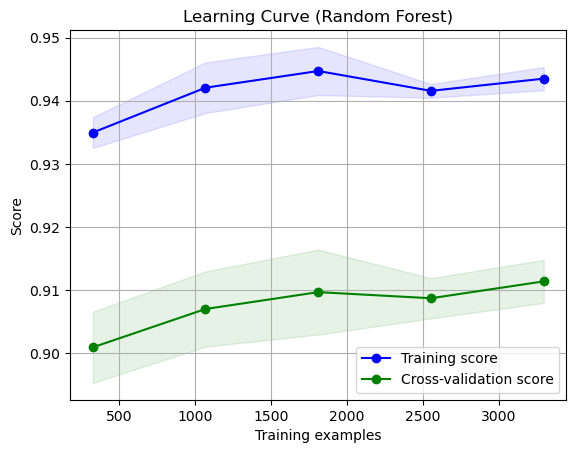

In [88]:
# Leaning Curve
def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="green")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(best_rf, df_selected, y, title="Learning Curve (Random Forest)", cv=5, n_jobs=-1)
plt.show()


It can be seen that the difference between the training set scores and the cross-validation set scores is not significant, indicating that the model is not over-fitted

### Gradient Boosting Model

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size=0.3, random_state=42)

gbt = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter adjustment
grid_search = GridSearchCV(gbt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

best_gbt = GradientBoostingClassifier(**best_params, random_state=42)
best_gbt.fit(X_train, y_train)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=10,
                           n_estimators=50, random_state=42)

In [100]:
#Predict
y_pred = best_gbt.predict(X_test)

#Evaluation of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#Check if the model is over-fitted
train_score = best_gbt.score(X_train, y_train)
test_score = best_gbt.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1105
           1       0.59      0.50      0.54       131

    accuracy                           0.91      1236
   macro avg       0.76      0.73      0.74      1236
weighted avg       0.90      0.91      0.91      1236

Accuracy Score:
0.9093851132686084
Train score: 0.9382587582379466
Test score: 0.9093851132686084


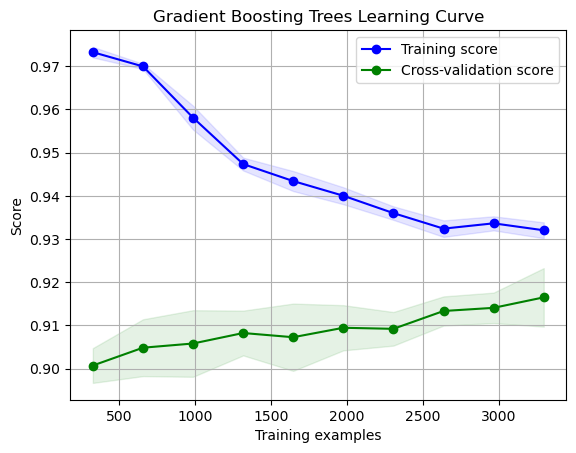

In [102]:
#Learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="green")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(best_gbt, "Gradient Boosting Trees Learning Curve", df_selected, y, cv=5)


It can be seen that the difference between the training set scores and the cross-validation set scores is not significant, indicating that the model is not over-fitted

### By comparing the above three models, we believe that the support vector machine model works best. We use a support vector machine model to solve the problem about whether the customer has subscribed a term deposit.